In [1]:
using QuantumStates, UnitsToValue

[ Info: Precompiling QuantumStates [17f0441f-15e0-42ae-a101-302633ff8f0f]


In [36]:
H_operator = :(
    BX * Rotation + 
    DX * RotationDistortion + 
    γX * SpinRotation + 
    bFX * Hyperfine_IS + 
    cX * (Hyperfine_Dipolar/3) +
    qX * ℓDoubling
);

In [37]:
parameters = @params begin
    BX = 0.333458 * 2.99792458e8 * 1e-4
    DX = 0.3930e-6 * 2.99792458e8 * 1e-4
    γX = 0.001184 * 2.99792458e8 * 1e-4
    qX = 0.7181e-3 * 2.99792458e8 * 1e-4
    bFX = 2.602 # 2.45
    cX = 2.053 # 2.6
end;

In [38]:
QN_bounds = (S = 1/2, I = 1/2, Λ = [-1,1], N = 1:3)
basis = enumerate_states(HundsCaseB_Rot, QN_bounds)
;

In [39]:
CaOH_X010 = @time Hamiltonian(basis=basis, operator=H_operator, parameters=parameters)
@time full_evaluate!(CaOH_X010)
@time solve!(CaOH_X010)
;

  0.013467 seconds (19.19 k allocations: 7.245 MiB)
  0.012696 seconds (18.84 k allocations: 3.047 MiB)
  0.071673 seconds (623 allocations: 950.453 KiB)


In [40]:
@time save_to_file(CaOH_X010, "CaOH_X010", "")

  0.008504 seconds (8.77 k allocations: 198.430 KiB)


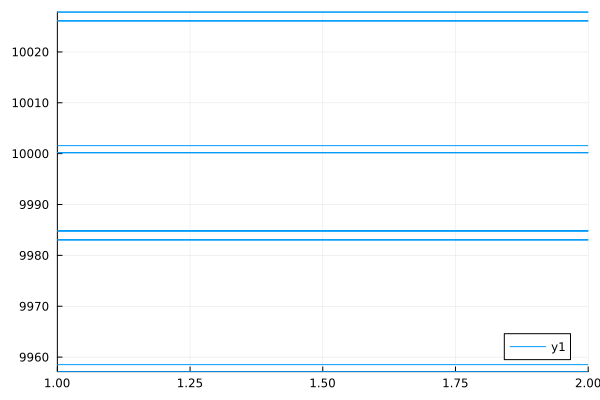

In [44]:
using Plots
hline(energy.(CaOH_X010.states[1:24]))